In [3]:
import matplotlib.pyplot as plt


import open3d as o3d
import json

import numpy as np
import os

import argparse
from system_constants import *


import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

In [4]:


def plot_2d(ax, x,y, title, xlabel, ylabel, legend=None):

    overlapping = 0.5
    ax.plot(x.to_numpy().flatten(),y.to_numpy()[:,0].flatten(), 'go-', alpha=overlapping, lw=5)#, label=ACCURACY_STR)
    ax.plot(x.to_numpy().flatten(),y.to_numpy()[:,1].flatten(), 'rd-', alpha=overlapping, lw=4)#, label=COMPELTENESS_STR)
    ax.plot(x.to_numpy().flatten(),y.to_numpy()[:,2].flatten(), 'bs-', alpha=overlapping, lw=3)#, label=ARTIFACTS_STR)
    ax.plot(x.to_numpy().flatten(),y.to_numpy()[:,3].flatten(), 'y*-', alpha=overlapping, lw=2)#, label=RESOLUTION_STR)
    ax.plot(x.to_numpy().flatten(),y.to_numpy()[:,4].flatten(), 'cx-', alpha=overlapping, lw=1)#, label=QUALITY_STR)
    ax.set_ylabel(ylabel, fontsize=28)
    ax.set_xlabel(xlabel, fontsize=28)
    ax.set_title(title, fontsize=28)

    if legend:
        ax.legend(legend, loc='upper left', fontsize=20)



def plot_2d_bar(ax, x,y, title, xlabel, ylabel, legend=None):
    title_map = {
        "voxel": "Downsample",
        "add": "Add",
        "remove": "Remove",
        "gaussian": "Gaussian",
        CONFIG_DAMAGE_PARAMS_STR: "Damage",
        QUALITY_STR: "Quality Metric",

    }

    legend_map = {
        "voxel": "Downsample",
        "add": "Add",
        "remove": "Remove",
        "gaussian": "Gaussian",
        CONFIG_DAMAGE_PARAMS_STR: "Damage",
        QUALITY_STR: "PQM",
        CHAMFER_STR: "Chamfer",
        HOUSDORFF_STR: "Hausdorff",
        ACCURACY_STR: "Accuracy",
        COMPELTENESS_STR: "Completeness",
        ARTIFACTS_STR: "Artifacts",
        RESOLUTION_STR: "Resolution",
        

    }


    width = 0.1
    if title=="voxel":
        width = (5*0.15)/len(legend)
        ylabel = title_map[ylabel] + "(Sample Rate)"
    else:
        width = (5*0.005)/len(legend)
        ylabel = title_map[ylabel] + "(%)"

    xlabel=    title_map[xlabel]

    title = title_map[title] + "(Cell Size: 0.05)"
    color_map = ['g', 'r', 'b', 'y', 'c']
    for i in range(len(legend)):
        ax.bar(x.to_numpy().flatten()+width*i,y.to_numpy()[:,i].flatten(), width, color=color_map[i])

    # plt.bar(x.to_numpy().flatten()        ,y.to_numpy()[:,0].flatten(), width, color='g')#, label=ACCURACY_STR)
    # plt.bar(x.to_numpy().flatten()+width*1,y.to_numpy()[:,1].flatten(), width, color='r')#, label=COMPELTENESS_STR)
    # plt.bar(x.to_numpy().flatten()+width*2,y.to_numpy()[:,2].flatten(), width, color='b')#, label=ARTIFACTS_STR)
    # plt.bar(x.to_numpy().flatten()+width*3,y.to_numpy()[:,3].flatten(), width, color='y')#, label=RESOLUTION_STR)
    # plt.bar(x.to_numpy().flatten()+width*4,y.to_numpy()[:,4].flatten(), width, color='c',)#, label=QUALITY_STR)
    plt.ylabel(xlabel, fontsize=28)
    plt.xlabel(ylabel, fontsize=28)
    plt.title(title, fontsize=28)

    plt.xticks(x.to_numpy().flatten()+width*2, fontsize=25)
    plt.yticks(np.arange(0, 1.5, 0.1), fontsize=25)

    plt.ylim([0,1.5])
    if legend:
        legend = [legend_map[l] for l in legend]
        plt.legend(legend, loc='upper left', fontsize=20)


In [5]:
def get_plot_data(full_path, cell_size, X_plot, Y_plot):



    results = {}

    results[COMPELTENESS_STR]=[]
    results[ACCURACY_STR]=[]
    results[ARTIFACTS_STR]=[]
    results[RESOLUTION_STR]=[]
    results[QUALITY_STR]=[]
    results[HOUSDORFF_STR]=    []
    results[NORMALIZED_CHAMFER_STR]=[]
    results[CHAMFER_STR]=[]

    results[CELL_SIZE_STR] =[]
    results[WEIGHT_ACCURACY_STR] = []
    results[WEIGHT_COMPLETENESS_STR] = []
    results[WEIGHT_ARTIFACTS_STR] = []
    results[WEIGHT_RESOLUTION_STR] = []
    results[EPSILON_STR] = []
    results[CONFIG_GT_FILE_STR] = []
    results[CONFIG_DAMAGE_STR] = []
    results[CONFIG_DAMAGE_PARAMS_STR] = []




    for path in os.listdir(full_path):
        if path.endswith(".json"):
            with open(os.path.join(full_path, path)) as f:
                data_load = json.load(f)
                attrib_dict={}
                attrib_dict[CELL_SIZE_STR] = data_load[CELL_SIZE_STR]
               
                attrib_dict[WEIGHT_ACCURACY_STR] = data_load[CONFIG_OPTIONS_STR][WEIGHT_ACCURACY_STR]
                attrib_dict[WEIGHT_COMPLETENESS_STR] = data_load[CONFIG_OPTIONS_STR][WEIGHT_COMPLETENESS_STR]
                attrib_dict[WEIGHT_ARTIFACTS_STR] = data_load[CONFIG_OPTIONS_STR][WEIGHT_ARTIFACTS_STR]
                attrib_dict[WEIGHT_RESOLUTION_STR] = data_load[CONFIG_OPTIONS_STR][WEIGHT_RESOLUTION_STR]
                attrib_dict[EPSILON_STR] = data_load[CONFIG_OPTIONS_STR][EPSILON_STR]
                file_name = os.path.basename(path)[:-5]
                
                gt_file, damage_type, damage_param, _, _, _ = file_name.split("_")  #gt_basename, damagetype, damage_params, cell_size, weight, eps_
                attrib_dict[CONFIG_GT_FILE_STR] = gt_file
                attrib_dict[CONFIG_DAMAGE_STR] = damage_type
                attrib_dict[CONFIG_DAMAGE_PARAMS_STR] = float(damage_param)

                results[COMPELTENESS_STR].append(data_load[AVERAGE_STR][COMPELTENESS_STR])
                results[ACCURACY_STR].append(data_load[AVERAGE_STR][ACCURACY_STR])
                results[ARTIFACTS_STR].append(data_load[AVERAGE_STR][ARTIFACTS_STR])
                results[RESOLUTION_STR].append(data_load[AVERAGE_STR][RESOLUTION_STR])
                results[QUALITY_STR].append(data_load[AVERAGE_STR][QUALITY_STR])
                results[HOUSDORFF_STR].append(data_load[HOUSDORFF_STR])
                results[NORMALIZED_CHAMFER_STR].append(data_load[NORMALIZED_CHAMFER_STR])
                results[CHAMFER_STR].append(data_load[CHAMFER_STR])

                for attrib in attrib_dict:
                    results[attrib].append(attrib_dict[attrib])
                

                #print("file_name: ", file_name)
                #print("attributes: ", attributes)


    results_df = pd.DataFrame.from_dict(results)
    
    #print(results_df.head())

    #results_df.set_index('Date', inplace=True)
    requred_columns = [CHAMFER_STR, HOUSDORFF_STR, ACCURACY_STR, COMPELTENESS_STR, ARTIFACTS_STR, RESOLUTION_STR, QUALITY_STR, CONFIG_DAMAGE_STR ,CONFIG_DAMAGE_PARAMS_STR, CELL_SIZE_STR]

    for name, group in results_df[requred_columns].groupby(CONFIG_DAMAGE_STR):
        #print('--------------------')
        print(name, len(group))
        #print('--------------------')
        #ax = fig.add_subplot(1, 4, indx_ax, projection='3d')

        fig = plt.figure(figsize=(30, 20))
        ax = fig.add_subplot()


        for cell_size_entry, group1 in group.groupby(CELL_SIZE_STR):
            print(cell_size_entry, len(group1))
            print('--------------------')
            

            if cell_size_entry == cell_size:

                #plt.plot(group1[[CONFIG_DAMAGE_PARAMS_STR]], group1[[ACCURACY_STR, COMPELTENESS_STR, ARTIFACTS_STR, RESOLUTION_STR, QUALITY_STR]], label=name1)
                group1.sort_values(by=CONFIG_DAMAGE_PARAMS_STR, ascending=False,inplace=True)
                group1.sort_values(by=QUALITY_STR, ascending=False,inplace=True)

                #print(group1)

                x = group1[X_plot]
                y = group1[Y_plot]
                

                print(x.shape, y.shape)


                plot_2d_bar(ax, x, y, name, QUALITY_STR, X_plot[0], Y_plot)

                plots_path = os.path.join(full_path,"plots")
                if not os.path.exists(plots_path):
                    os.makedirs(plots_path, exist_ok=True)
                print(name)
                #plt.savefig(os.path.join(plots_path,"{}_2d_all.pdf".format(name)))
                plt.savefig(os.path.join(plots_path,"{}_2d_all.png".format(name)))
                
                ax.legend(labels=Y_plot, loc='upper right', fontsize=28)
                plt.show()
                # return

        
        

    return

In [6]:
path = '../results/bunny_v7_v1/'
cell_size = 0.05
X_plot = [CONFIG_DAMAGE_PARAMS_STR]
Y_plot = [ACCURACY_STR, COMPELTENESS_STR, ARTIFACTS_STR, RESOLUTION_STR, QUALITY_STR]

In [ ]:
get_plot_data(path, cell_size, X_plot, Y_plot)

In [ ]:
path = '../results/bunny_v7_v1/'
cell_size = 0.05
X_plot = [CONFIG_DAMAGE_PARAMS_STR]
Y_plot = [CHAMFER_STR, HOUSDORFF_STR]
get_plot_data(path, cell_size, X_plot, Y_plot)

# Housdorff and Chamfer plot

In [9]:

def plot_2d_ref_metric(ax, x,y, title, xlabel, ylabel, legend=None):

    overlapping = 0.5
    ax.plot(x.to_numpy().flatten(),y.to_numpy()[:,0].flatten(), 'go-', alpha=overlapping, lw=5)
    ax.plot(x.to_numpy().flatten(),y.to_numpy()[:,1].flatten(), 'rd-', alpha=overlapping, lw=4)
    ax.set_ylabel(ylabel, fontsize=28)
    ax.set_xlabel(xlabel, fontsize=28)
    ax.set_title(title, fontsize=28)

    if legend:
        ax.legend(legend, loc='upper left', fontsize=20)



def get_dual_axis_plot(full_path, cell_size, X_plot, Y_plot):

    results = {}

    results[COMPELTENESS_STR]=[]
    results[ACCURACY_STR]=[]
    results[ARTIFACTS_STR]=[]
    results[RESOLUTION_STR]=[]
    results[QUALITY_STR]=[]
    results[HOUSDORFF_STR]=    []
    results[NORMALIZED_CHAMFER_STR]=[]
    results[CHAMFER_STR]=[]

    results[CELL_SIZE_STR] =[]
    results[WEIGHT_ACCURACY_STR] = []
    results[WEIGHT_COMPLETENESS_STR] = []
    results[WEIGHT_ARTIFACTS_STR] = []
    results[WEIGHT_RESOLUTION_STR] = []
    results[EPSILON_STR] = []
    results[CONFIG_GT_FILE_STR] = []
    results[CONFIG_DAMAGE_STR] = []
    results[CONFIG_DAMAGE_PARAMS_STR] = []




    for path in os.listdir(full_path):
        if path.endswith(".json"):
            with open(os.path.join(full_path, path)) as f:
                data_load = json.load(f)
                attrib_dict={}
                attrib_dict[CELL_SIZE_STR] = data_load[CELL_SIZE_STR]
               
                attrib_dict[WEIGHT_ACCURACY_STR] = data_load[CONFIG_OPTIONS_STR][WEIGHT_ACCURACY_STR]
                attrib_dict[WEIGHT_COMPLETENESS_STR] = data_load[CONFIG_OPTIONS_STR][WEIGHT_COMPLETENESS_STR]
                attrib_dict[WEIGHT_ARTIFACTS_STR] = data_load[CONFIG_OPTIONS_STR][WEIGHT_ARTIFACTS_STR]
                attrib_dict[WEIGHT_RESOLUTION_STR] = data_load[CONFIG_OPTIONS_STR][WEIGHT_RESOLUTION_STR]
                attrib_dict[EPSILON_STR] = data_load[CONFIG_OPTIONS_STR][EPSILON_STR]
                file_name = os.path.basename(path)[:-5]
                
                gt_file, damage_type, damage_param, _, _, _ = file_name.split("_")  #gt_basename, damagetype, damage_params, cell_size, weight, eps_
                attrib_dict[CONFIG_GT_FILE_STR] = gt_file
                attrib_dict[CONFIG_DAMAGE_STR] = damage_type
                attrib_dict[CONFIG_DAMAGE_PARAMS_STR] = float(damage_param)

                results[COMPELTENESS_STR].append(data_load[AVERAGE_STR][COMPELTENESS_STR])
                results[ACCURACY_STR].append(data_load[AVERAGE_STR][ACCURACY_STR])
                results[ARTIFACTS_STR].append(data_load[AVERAGE_STR][ARTIFACTS_STR])
                results[RESOLUTION_STR].append(data_load[AVERAGE_STR][RESOLUTION_STR])
                results[QUALITY_STR].append(data_load[AVERAGE_STR][QUALITY_STR])
                results[HOUSDORFF_STR].append(data_load[HOUSDORFF_STR])
                results[NORMALIZED_CHAMFER_STR].append(data_load[NORMALIZED_CHAMFER_STR])
                results[CHAMFER_STR].append(data_load[CHAMFER_STR])

                for attrib in attrib_dict:
                    results[attrib].append(attrib_dict[attrib])
                


    results_df = pd.DataFrame.from_dict(results)



    requred_columns = [CHAMFER_STR, HOUSDORFF_STR, ACCURACY_STR, COMPELTENESS_STR, ARTIFACTS_STR, RESOLUTION_STR, QUALITY_STR, CONFIG_DAMAGE_STR ,CONFIG_DAMAGE_PARAMS_STR, CELL_SIZE_STR]

    fig, axs = plt.subplots(1,4, figsize=(20,5))
    axi_index=0
    font_size=12

    title_map = {
        "voxel": "Downsample",
        "add": "Add",
        "remove": "Remove",
        "gaussian": "Gaussian",
        CONFIG_DAMAGE_PARAMS_STR: "Damage",
        QUALITY_STR: "Quality Metric",

    }

    legend_map = {
        "voxel": "Downsample",
        "add": "Add",
        "remove": "Remove",
        "gaussian": "Gaussian",
        CONFIG_DAMAGE_PARAMS_STR: "Damage",
        QUALITY_STR: "PQM",
        CHAMFER_STR: "Chamfer",
        HOUSDORFF_STR: "Hausdorff",
        ACCURACY_STR: "Accuracy",
        COMPELTENESS_STR: "Completeness",
        ARTIFACTS_STR: "Artifacts",
        RESOLUTION_STR: "Resolution",
        

    }


    for name, group in results_df[requred_columns].groupby(CONFIG_DAMAGE_STR):
        #print('--------------------')
        print(name, len(group))
        #print('--------------------')
        #ax = fig.add_subplot(1, 4, indx_ax, projection='3d')

        
        #axs = fig.add_subplot((1,4))

        
        for cell_size_entry, group1 in group.groupby(CELL_SIZE_STR):
            print(cell_size_entry, len(group1))
            print('--------------------')
            

            if cell_size_entry == cell_size:

                #plt.plot(group1[[CONFIG_DAMAGE_PARAMS_STR]], group1[[ACCURACY_STR, COMPELTENESS_STR, ARTIFACTS_STR, RESOLUTION_STR, QUALITY_STR]], label=name1)
                group1.sort_values(by=CONFIG_DAMAGE_PARAMS_STR, ascending=False,inplace=True)
                group1.sort_values(by=QUALITY_STR, ascending=False,inplace=True)

                #print(group1)

                x = group1[X_plot]
                y = group1[Y_plot]
                

                print(x.shape, y.shape)

                #####################################################
                #fig, ax1 = plt.subplots(figsize=(8, 8))
                ax1 = axs[axi_index]
                ax2 = ax1.twinx()
                
                ax1.plot(x.to_numpy().flatten() ,y.to_numpy()[:,0].flatten(), 'g-')
                ax2.plot(x.to_numpy().flatten() ,y.to_numpy()[:,1].flatten(), 'b-')
                damage_title = "Damage (%)"
                if name == "voxel":
                    damage_title = "Downsample (Sample Rate)"
                ax1.set_xlabel(damage_title, fontsize=font_size)
                ax1.set_ylabel(legend_map[Y_plot[0]], color='g', fontsize=font_size)
                ax2.set_ylabel(legend_map[Y_plot[1]], color='b', fontsize=font_size)
                
                axi_index+=1

                ax2.set_title(title_map[name], fontsize=font_size)



    fig.tight_layout(pad=0.05)
    plt.savefig(os.path.join("../results/Images_plots/ref_metric_damage.pdf"), bbox_inches="tight")
    plt.show()
        
        

    return

add 19
0.05 19
--------------------
(19, 1) (19, 2)
gaussian 19
0.05 19
--------------------
(19, 1) (19, 2)
remove 19
0.05 19
--------------------
(19, 1) (19, 2)
voxel 19
0.05 19
--------------------
(19, 1) (19, 2)


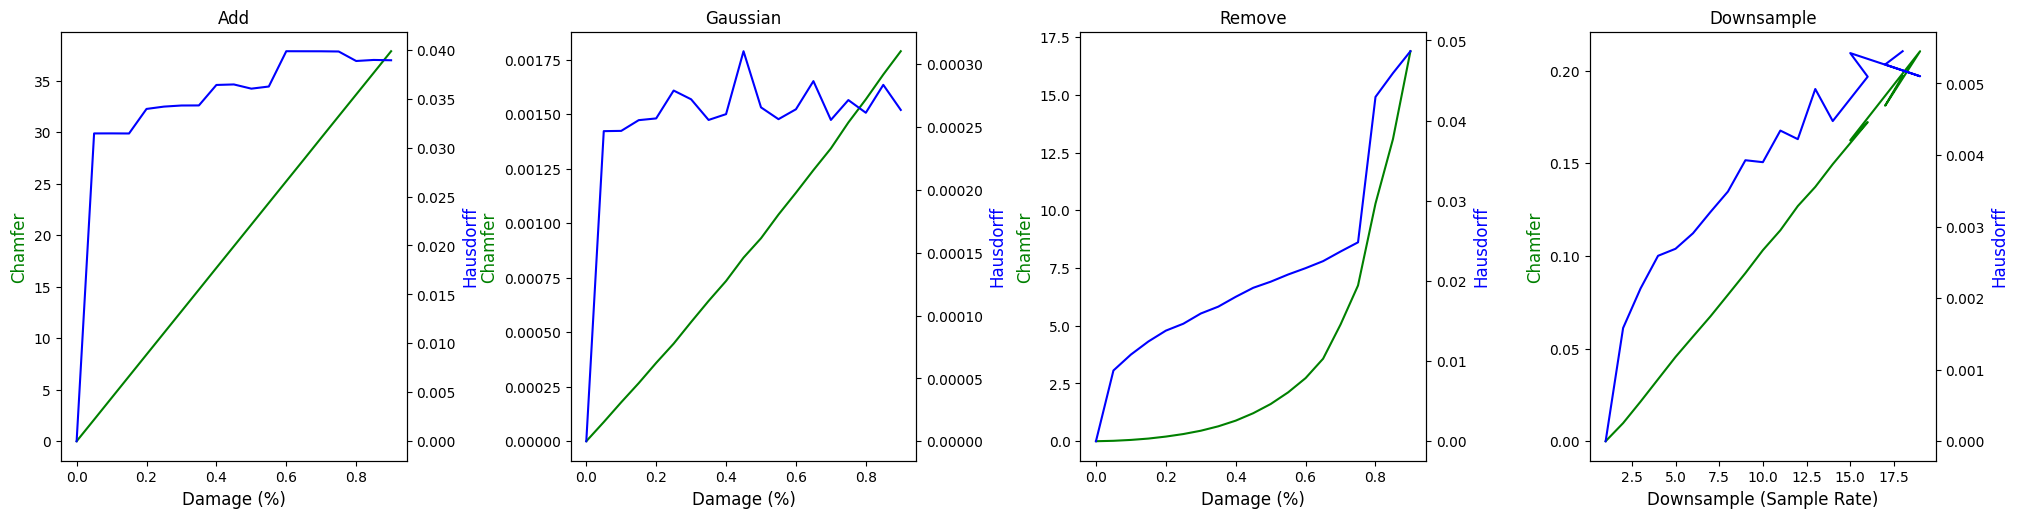

In [10]:
path = '../results/bunny_v7_v1/'
cell_size = 0.05
X_plot = [CONFIG_DAMAGE_PARAMS_STR]
Y_plot = [CHAMFER_STR, HOUSDORFF_STR]
get_dual_axis_plot(path, cell_size, X_plot, Y_plot)


## Variance experiment


In [11]:
import glob

def get_results_from_path(full_path, required_columns):


    results = {}

    results[COMPELTENESS_STR]=[]
    results[ACCURACY_STR]=[]
    results[ARTIFACTS_STR]=[]
    results[RESOLUTION_STR]=[]
    results[QUALITY_STR]=[]
    results[HOUSDORFF_STR]=    []
    results[NORMALIZED_CHAMFER_STR]=[]
    results[CHAMFER_STR]=[]

    results[CELL_SIZE_STR] =[]
    results[WEIGHT_ACCURACY_STR] = []
    results[WEIGHT_COMPLETENESS_STR] = []
    results[WEIGHT_ARTIFACTS_STR] = []
    results[WEIGHT_RESOLUTION_STR] = []
    results[EPSILON_STR] = []
    results[CONFIG_GT_FILE_STR] = []
    results[CONFIG_DAMAGE_STR] = []
    results[CONFIG_DAMAGE_PARAMS_STR] = []




    for path in os.listdir(full_path):
        if path.endswith(".json"):
            with open(os.path.join(full_path, path)) as f:
                data_load = json.load(f)
                attrib_dict={}
                attrib_dict[CELL_SIZE_STR] = data_load[CELL_SIZE_STR]
               
                attrib_dict[WEIGHT_ACCURACY_STR] = data_load[CONFIG_OPTIONS_STR][WEIGHT_ACCURACY_STR]
                attrib_dict[WEIGHT_COMPLETENESS_STR] = data_load[CONFIG_OPTIONS_STR][WEIGHT_COMPLETENESS_STR]
                attrib_dict[WEIGHT_ARTIFACTS_STR] = data_load[CONFIG_OPTIONS_STR][WEIGHT_ARTIFACTS_STR]
                attrib_dict[WEIGHT_RESOLUTION_STR] = data_load[CONFIG_OPTIONS_STR][WEIGHT_RESOLUTION_STR]
                attrib_dict[EPSILON_STR] = data_load[CONFIG_OPTIONS_STR][EPSILON_STR]
                file_name = os.path.basename(path)[:-5]
                
                gt_file, damage_type, damage_param, _, _, _ = file_name.split("_")  #gt_basename, damagetype, damage_params, cell_size, weight, eps_
                attrib_dict[CONFIG_GT_FILE_STR] = gt_file
                attrib_dict[CONFIG_DAMAGE_STR] = damage_type
                attrib_dict[CONFIG_DAMAGE_PARAMS_STR] = float(damage_param)

                results[COMPELTENESS_STR].append(data_load[AVERAGE_STR][COMPELTENESS_STR])
                results[ACCURACY_STR].append(data_load[AVERAGE_STR][ACCURACY_STR])
                results[ARTIFACTS_STR].append(data_load[AVERAGE_STR][ARTIFACTS_STR])
                results[RESOLUTION_STR].append(data_load[AVERAGE_STR][RESOLUTION_STR])
                results[QUALITY_STR].append(data_load[AVERAGE_STR][QUALITY_STR])
                results[HOUSDORFF_STR].append(data_load[HOUSDORFF_STR])
                results[NORMALIZED_CHAMFER_STR].append(data_load[NORMALIZED_CHAMFER_STR])
                results[CHAMFER_STR].append(data_load[CHAMFER_STR])

                for attrib in attrib_dict:
                    results[attrib].append(attrib_dict[attrib])
                

                #print("file_name: ", file_name)
                #print("attributes: ", attributes)


    results_df = pd.DataFrame.from_dict(results)
    return results_df[required_columns]

def get_variance_data(full_path, required_columns, xticklabels):

    df_list = []
    for path in glob.glob(full_path+'_*'):
        print(path)
        df_list.append(get_results_from_path(path, required_columns))
        #print(df_list[-1].head())

    pd.concat(df_list).pivot_table(index=["damage",  "damage_params"], aggfunc=[np.var]).plot.box(title="Variance").set_xticklabels(xticklabels)
    #print(pd.concat(df_list).pivot_table(index=["damage",  "damage_params"], aggfunc=[ np.var]))

    pd.concat(df_list).pivot_table(index=["damage",  "damage_params"], aggfunc=[np.std]).plot.box(title="Standard Deviation").set_xticklabels(xticklabels)



    data_var = pd.concat(df_list).pivot_table(index=["damage",  "damage_params"], aggfunc=[ np.var])
    print(type(data_var))
    new_dataframe = pd.DataFrame()
    for key_val in data_var.keys():
        print(key_val, key_val[1])
        new_dataframe[key_val[1]] = data_var[key_val]

    for name, group in new_dataframe.groupby(CONFIG_DAMAGE_STR):
        #print(name)
        print(group.keys(), name)
        group.plot.box(title=name).set_xticklabels(xticklabels)
        #print(group[CONFIG_DAMAGE_PARAMS_STR].shape, group[ACCURACY_STR].shape)
        #plt.errorbar(x=CONFIG_DAMAGE_PARAMS_STR, y=ACCURACY_STR, data=group)
        plt.show()

In [12]:
# path = '../results/bunny_v7'
# requred_columns = [ACCURACY_STR, COMPELTENESS_STR, ARTIFACTS_STR, RESOLUTION_STR, QUALITY_STR, CONFIG_DAMAGE_STR ,CONFIG_DAMAGE_PARAMS_STR]
# x_tick_labels = [ACCURACY_STR, ARTIFACTS_STR, COMPELTENESS_STR, QUALITY_STR , RESOLUTION_STR]
# get_variance_data(path, requred_columns, x_tick_labels)

## Error bar plot

In [13]:
import glob
import matplotlib.transforms as mtrans


def get_errorbar_plot(full_path, required_columns, xticklabels):

    df_list = []
    for path in glob.glob(full_path+'_*'):
        print(path)
        df_list.append(get_results_from_path(path, required_columns))

    new_df = pd.DataFrame()

    fig, ax = plt.subplots(1,4, figsize=(20,5))

    damage_vs_index = {
        ADD_POINTS_STR: 0,#(0,0),
        REMOVE_POINTS_STR: 1,#(0,1),
        GAUSSIAN_STR: 2, #(1,0),
        DOWNSAMPLE_STR: 3, #(1,1)
    }

    damage_to_title = {
        ADD_POINTS_STR: "Add Points",
        REMOVE_POINTS_STR: "Remove Points",
        GAUSSIAN_STR: "Gaussian Noise",
        DOWNSAMPLE_STR: "Down sample",
        ACCURACY_STR: "Accuracy",
        COMPELTENESS_STR: "Completeness",
        ARTIFACTS_STR: "Artifacts",
        RESOLUTION_STR: "Resolution",
        QUALITY_STR: "PQM",
    }


    font_size = 12

    metric_to_color = {
        ACCURACY_STR: 'r',
        COMPELTENESS_STR: 'g',
        ARTIFACTS_STR: 'b',
        RESOLUTION_STR: 'y',
        QUALITY_STR: 'c',
    }
    
    metric_to_fmt = {
        ACCURACY_STR: '-',
        COMPELTENESS_STR: ':',
        ARTIFACTS_STR: ':',
        RESOLUTION_STR: ':',
        QUALITY_STR: ':',
    }
    for damage in df_list[0][CONFIG_DAMAGE_STR].unique():
        print(damage)
        x_data = {}
        y_data = []
        x_data[ACCURACY_STR] = []
        x_data[ARTIFACTS_STR] = []
        x_data[COMPELTENESS_STR] = []
        x_data[QUALITY_STR] = []
        x_data[RESOLUTION_STR] = []

        for i in range(len(df_list)):
            df_curr = df_list[i][df_list[i][CONFIG_DAMAGE_STR]==damage].sort_values(by=[CONFIG_DAMAGE_PARAMS_STR])

            x_data[ACCURACY_STR].append(df_curr[ACCURACY_STR])
            x_data[ARTIFACTS_STR].append(df_curr[ARTIFACTS_STR])
            x_data[COMPELTENESS_STR].append(df_curr[COMPELTENESS_STR])
            x_data[QUALITY_STR].append(df_curr[QUALITY_STR])
            x_data[RESOLUTION_STR].append(df_curr[RESOLUTION_STR])  
            #print(df_list[i].keys())
        
            y_data = np.array(df_curr[CONFIG_DAMAGE_PARAMS_STR])
            break



        x_data[ACCURACY_STR] = np.array(x_data[ACCURACY_STR])
        x_data[ARTIFACTS_STR] = np.array(x_data[ARTIFACTS_STR])
        x_data[COMPELTENESS_STR] = np.array(x_data[COMPELTENESS_STR])
        x_data[QUALITY_STR] = np.array(x_data[QUALITY_STR])
        x_data[RESOLUTION_STR] = np.array(x_data[RESOLUTION_STR])

        #print(x_data[ACCURACY_STR].min(axis=0).shape, y_data.shape)
        #print(y_data)
        plt_i = damage_vs_index[damage]
        for metric in [ACCURACY_STR, ARTIFACTS_STR, COMPELTENESS_STR, QUALITY_STR , RESOLUTION_STR]:
            
            ax[plt_i].errorbar(y_data, x_data[metric].mean(axis=0), xerr=x_data[metric].max(axis=0)- x_data[metric].min(axis=0), yerr=x_data[metric].max(axis=0)- x_data[metric].min(axis=0), label=metric, color=metric_to_color[metric], ls=metric_to_fmt[metric], lw=5) 
            #plt.legend()
            ax[plt_i].set_title(damage_to_title[damage], loc='left', y=-0.01, fontsize=font_size)

            damage_title = "Damage (%)"
            #if damage == DOWNSAMPLE_STR:
            #    damage_title = "Downsample (Sample Rate)"
            #ax[plt_i].set_xlabel(damage_title, fontsize=font_size, y=-0.01)
            ax[plt_i].set_ylabel("Metric", fontsize=font_size)
            
    xticklabels = [damage_to_title[x] for x in xticklabels]        

    ax[1].sharex(ax[0])
    ax[2].sharex(ax[0])
    #ax[0].set_xlabel("Damage (%)", fontsize=font_size, y=-0.01)

    #ax[3].set_xlabel("Damage (sample rate)", fontsize=font_size, y=-0.01)
    
    fig.text(0.4, 0.04, 'Damage (%) -> ', ha='center', fontsize=font_size)
    fig.text(0.90, 0.04, 'Damage (sample rate) ->', ha='center', fontsize=font_size)


    fig.legend(xticklabels, loc='upper center', ncol=5, fontsize=font_size)
    plt.tight_layout(pad=4)


    ys = [0.75]
    # Draw a horizontal lines at those coordinates
    for y in ys:
        line = plt.Line2D([y,y],[0,1], transform=fig.transFigure, color="black")
        fig.add_artist(line)



    plt.savefig(os.path.join("../results/Images_plots/bunny_damage_plots.pdf"),bbox_inches="tight")
    plt.show()
        

../results/bunny_v7_v2
../results/bunny_v7_v5
../results/bunny_v7_v4
../results/bunny_v7_v3
../results/bunny_v7_v1
gaussian
voxel
remove
add


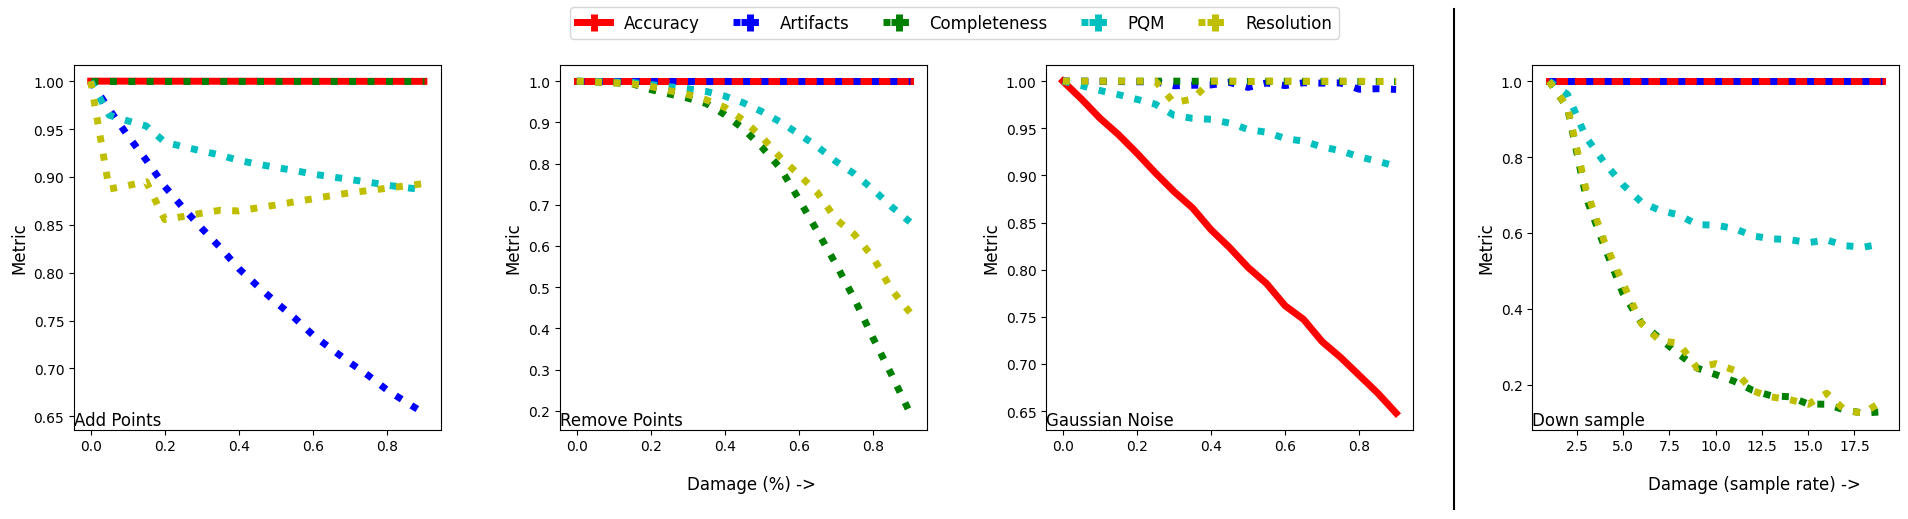

In [14]:
path = '../results/bunny_v7'
requred_columns = [ACCURACY_STR, COMPELTENESS_STR, ARTIFACTS_STR, RESOLUTION_STR, QUALITY_STR, CONFIG_DAMAGE_STR ,CONFIG_DAMAGE_PARAMS_STR]
x_tick_labels = [ACCURACY_STR, ARTIFACTS_STR, COMPELTENESS_STR, QUALITY_STR , RESOLUTION_STR]
get_errorbar_plot(path, requred_columns, x_tick_labels)

## Combined Plot

In [15]:
import glob
import matplotlib.transforms as mtrans





def get_dual_axis_plot_new(fig, axs, full_path, cell_size, X_plot, Y_plot):

    results = {}

    results[COMPELTENESS_STR]=[]
    results[ACCURACY_STR]=[]
    results[ARTIFACTS_STR]=[]
    results[RESOLUTION_STR]=[]
    results[QUALITY_STR]=[]
    results[HOUSDORFF_STR]=    []
    results[NORMALIZED_CHAMFER_STR]=[]
    results[CHAMFER_STR]=[]

    results[CELL_SIZE_STR] =[]
    results[WEIGHT_ACCURACY_STR] = []
    results[WEIGHT_COMPLETENESS_STR] = []
    results[WEIGHT_ARTIFACTS_STR] = []
    results[WEIGHT_RESOLUTION_STR] = []
    results[EPSILON_STR] = []
    results[CONFIG_GT_FILE_STR] = []
    results[CONFIG_DAMAGE_STR] = []
    results[CONFIG_DAMAGE_PARAMS_STR] = []




    for path in os.listdir(full_path):
        if path.endswith(".json"):
            with open(os.path.join(full_path, path)) as f:
                data_load = json.load(f)
                attrib_dict={}
                attrib_dict[CELL_SIZE_STR] = data_load[CELL_SIZE_STR]
               
                attrib_dict[WEIGHT_ACCURACY_STR] = data_load[CONFIG_OPTIONS_STR][WEIGHT_ACCURACY_STR]
                attrib_dict[WEIGHT_COMPLETENESS_STR] = data_load[CONFIG_OPTIONS_STR][WEIGHT_COMPLETENESS_STR]
                attrib_dict[WEIGHT_ARTIFACTS_STR] = data_load[CONFIG_OPTIONS_STR][WEIGHT_ARTIFACTS_STR]
                attrib_dict[WEIGHT_RESOLUTION_STR] = data_load[CONFIG_OPTIONS_STR][WEIGHT_RESOLUTION_STR]
                attrib_dict[EPSILON_STR] = data_load[CONFIG_OPTIONS_STR][EPSILON_STR]
                file_name = os.path.basename(path)[:-5]
                
                gt_file, damage_type, damage_param, _, _, _ = file_name.split("_")  #gt_basename, damagetype, damage_params, cell_size, weight, eps_
                attrib_dict[CONFIG_GT_FILE_STR] = gt_file
                attrib_dict[CONFIG_DAMAGE_STR] = damage_type
                attrib_dict[CONFIG_DAMAGE_PARAMS_STR] = float(damage_param)

                results[COMPELTENESS_STR].append(data_load[AVERAGE_STR][COMPELTENESS_STR])
                results[ACCURACY_STR].append(data_load[AVERAGE_STR][ACCURACY_STR])
                results[ARTIFACTS_STR].append(data_load[AVERAGE_STR][ARTIFACTS_STR])
                results[RESOLUTION_STR].append(data_load[AVERAGE_STR][RESOLUTION_STR])
                results[QUALITY_STR].append(data_load[AVERAGE_STR][QUALITY_STR])
                results[HOUSDORFF_STR].append(data_load[HOUSDORFF_STR])
                results[NORMALIZED_CHAMFER_STR].append(data_load[NORMALIZED_CHAMFER_STR])
                results[CHAMFER_STR].append(data_load[CHAMFER_STR])

                for attrib in attrib_dict:
                    results[attrib].append(attrib_dict[attrib])
                


    results_df = pd.DataFrame.from_dict(results)



    requred_columns = [CHAMFER_STR, HOUSDORFF_STR, ACCURACY_STR, COMPELTENESS_STR, ARTIFACTS_STR, RESOLUTION_STR, QUALITY_STR, CONFIG_DAMAGE_STR ,CONFIG_DAMAGE_PARAMS_STR, CELL_SIZE_STR]

    #fig, axs =  plt.subplots(1,4, figsize=(20,5))
    axi_index=0
    font_size=15

    title_map = {
        "voxel": "Downsample",
        "add": "Add",
        "remove": "Remove",
        "gaussian": "Gaussian",
        CONFIG_DAMAGE_PARAMS_STR: "Damage",
        QUALITY_STR: "Quality Metric",

    }

    legend_map = {
        "voxel": "Downsample",
        "add": "Add",
        "remove": "Remove",
        "gaussian": "Gaussian",
        CONFIG_DAMAGE_PARAMS_STR: "Damage",
        QUALITY_STR: "PQM",
        CHAMFER_STR: "Chamfer",
        HOUSDORFF_STR: "Hausdorff",
        ACCURACY_STR: "Accuracy",
        COMPELTENESS_STR: "Completeness",
        ARTIFACTS_STR: "Artifacts",
        RESOLUTION_STR: "Resolution",
        

    }

    damge_type_to_axis = {
        "voxel": 3,
        "add": 0,
        "remove": 1,
        "gaussian": 2
    }

    for name, group in results_df[requred_columns].groupby(CONFIG_DAMAGE_STR):
        #print('--------------------')
        print(name, len(group))
        #print('--------------------')
        #ax = fig.add_subplot(1, 4, indx_ax, projection='3d')

        
        #axs = fig.add_subplot((1,4))

        
        for cell_size_entry, group1 in group.groupby(CELL_SIZE_STR):
            print(cell_size_entry, len(group1))
            print('--------------------')
            

            if cell_size_entry == cell_size:

                #plt.plot(group1[[CONFIG_DAMAGE_PARAMS_STR]], group1[[ACCURACY_STR, COMPELTENESS_STR, ARTIFACTS_STR, RESOLUTION_STR, QUALITY_STR]], label=name1)
                group1.sort_values(by=CONFIG_DAMAGE_PARAMS_STR, ascending=False,inplace=True)
                group1.sort_values(by=QUALITY_STR, ascending=False,inplace=True)

                #print(group1)

                x = group1[X_plot]
                y = group1[Y_plot]
                

                print(x.shape, y.shape)

                #####################################################
                #fig, ax1 = plt.subplots(figsize=(8, 8))
                ax1 = axs[damge_type_to_axis[name]] # axs[axi_index]
                ax2 = ax1.twinx()
                
                ax1.plot(x.to_numpy().flatten() ,y.to_numpy()[:,0].flatten(), 'g-')
                ax2.plot(x.to_numpy().flatten() ,y.to_numpy()[:,1].flatten(), 'b-')
                damage_title = "Damage (%)"
                if name == "voxel":
                    damage_title = "Downsample (Sample Rate)"

                if axi_index == 0:
                    ax1.set_ylabel(legend_map[Y_plot[0]], color='g', fontsize=font_size, weight='bold')
                elif axi_index==3:
                    ax2.set_ylabel(legend_map[Y_plot[1]], color='b', fontsize=font_size, weight='bold')
                #ax1.set_xlabel(damage_title, fontsize=font_size)
                #ax1.set_ylabel(legend_map[Y_plot[0]], color='g', fontsize=font_size)
                #ax2.set_ylabel(legend_map[Y_plot[1]], color='b', fontsize=font_size)
                
                axi_index+=1

                ax2.set_title(title_map[name], fontsize=font_size, weight='bold', pad=10)



    # fig.tight_layout(pad=0.05)
    # plt.savefig(os.path.join("../results/Images_plots/ref_metric_damage.pdf"), bbox_inches="tight")
    # plt.show()
        
        

    return



def get_errorbar_plot_new(fig, ax, full_path, required_columns, xticklabels):

    df_list = []
    for path in glob.glob(full_path+'_*'):
        print(path)
        df_list.append(get_results_from_path(path, required_columns))

    new_df = pd.DataFrame()

    #fig, ax = plt.subplots(1,4, figsize=(20,5))

    damage_vs_index = {
        ADD_POINTS_STR: 0,#(0,0),
        REMOVE_POINTS_STR: 1,#(0,1),
        GAUSSIAN_STR: 2, #(1,0),
        DOWNSAMPLE_STR: 3, #(1,1)
    }

    damage_to_title = {
        ADD_POINTS_STR: "Add Points",
        REMOVE_POINTS_STR: "Remove Points",
        GAUSSIAN_STR: "Gaussian Noise",
        DOWNSAMPLE_STR: "Down sample",
        ACCURACY_STR: "Accuracy",
        COMPELTENESS_STR: "Completeness",
        ARTIFACTS_STR: "Artifacts",
        RESOLUTION_STR: "Resolution",
        QUALITY_STR: "PQM",
    }


    font_size = 12

    metric_to_color = {
        ACCURACY_STR: 'r',
        COMPELTENESS_STR: 'g',
        ARTIFACTS_STR: 'b',
        RESOLUTION_STR: 'y',
        QUALITY_STR: 'c',
    }
    
    metric_to_fmt = {
        ACCURACY_STR: '-',
        COMPELTENESS_STR: ':',
        ARTIFACTS_STR: ':',
        RESOLUTION_STR: ':',
        QUALITY_STR: ':',
    }
    for damage in df_list[0][CONFIG_DAMAGE_STR].unique():
        print(damage)
        x_data = {}
        y_data = []
        x_data[ACCURACY_STR] = []
        x_data[ARTIFACTS_STR] = []
        x_data[COMPELTENESS_STR] = []
        x_data[QUALITY_STR] = []
        x_data[RESOLUTION_STR] = []

        for i in range(len(df_list)):
            df_curr = df_list[i][df_list[i][CONFIG_DAMAGE_STR]==damage].sort_values(by=[CONFIG_DAMAGE_PARAMS_STR])

            x_data[ACCURACY_STR].append(df_curr[ACCURACY_STR])
            x_data[ARTIFACTS_STR].append(df_curr[ARTIFACTS_STR])
            x_data[COMPELTENESS_STR].append(df_curr[COMPELTENESS_STR])
            x_data[QUALITY_STR].append(df_curr[QUALITY_STR])
            x_data[RESOLUTION_STR].append(df_curr[RESOLUTION_STR])  
            #print(df_list[i].keys())
        
            y_data = np.array(df_curr[CONFIG_DAMAGE_PARAMS_STR])
            break



        x_data[ACCURACY_STR] = np.array(x_data[ACCURACY_STR])
        x_data[ARTIFACTS_STR] = np.array(x_data[ARTIFACTS_STR])
        x_data[COMPELTENESS_STR] = np.array(x_data[COMPELTENESS_STR])
        x_data[QUALITY_STR] = np.array(x_data[QUALITY_STR])
        x_data[RESOLUTION_STR] = np.array(x_data[RESOLUTION_STR])

        #print(x_data[ACCURACY_STR].min(axis=0).shape, y_data.shape)
        #print(y_data)
        plt_i = damage_vs_index[damage]
        for metric in [ACCURACY_STR, ARTIFACTS_STR, COMPELTENESS_STR, QUALITY_STR , RESOLUTION_STR]:
            metric_legend = damage_to_title[metric]
            print("metric legend: ",metric_legend)
            ax[plt_i].errorbar(y_data, x_data[metric].mean(axis=0), xerr=x_data[metric].max(axis=0)- x_data[metric].min(axis=0), yerr=x_data[metric].max(axis=0)- x_data[metric].min(axis=0), label=metric_legend, color=metric_to_color[metric], ls=metric_to_fmt[metric], lw=4) 

            
    #xticklabels = [damage_to_title[x] for x in xticklabels]        

    ax[1].sharex(ax[0])
    ax[2].sharex(ax[0])

        

In [16]:
def combined_plot():

    font_size = 15
    
    fig, axes = plt.subplots(2,4, figsize=(20,10))

    path = '../results/bunny_v7_v1/'
    cell_size = 0.05
    X_plot = [CONFIG_DAMAGE_PARAMS_STR]
    Y_plot = [CHAMFER_STR, HOUSDORFF_STR]

    ax2 = [axes[0,0], axes[0,1], axes[0,2], axes[0,3]]
    ax1 = [axes[1,0], axes[1,1], axes[1,2], axes[1,3]]
    
    get_dual_axis_plot_new(fig, ax1, path, cell_size, X_plot, Y_plot)


    path = '../results/bunny_v7'
    requred_columns = [ACCURACY_STR, COMPELTENESS_STR, ARTIFACTS_STR, RESOLUTION_STR, QUALITY_STR, CONFIG_DAMAGE_STR ,CONFIG_DAMAGE_PARAMS_STR]
    x_tick_labels = [ACCURACY_STR, ARTIFACTS_STR, COMPELTENESS_STR, QUALITY_STR , RESOLUTION_STR]
    get_errorbar_plot_new(fig, ax2, path, requred_columns, x_tick_labels)


    ax2[0].set_ylabel("Our Metric", fontsize=font_size, weight='bold')

    fig.text(0.4, 0.01, 'Damage (%) -> ', ha='center', fontsize=font_size, weight='bold')
    fig.text(0.85, 0.01, 'Damage (sample rate) ->', ha='center', fontsize=font_size , weight='bold')


    damage_to_title = {
        ADD_POINTS_STR: "Add Points",
        REMOVE_POINTS_STR: "Remove Points",
        GAUSSIAN_STR: "Gaussian Noise",
        DOWNSAMPLE_STR: "Down sample",
        ACCURACY_STR: "Accuracy",
        COMPELTENESS_STR: "Completeness",
        ARTIFACTS_STR: "Artifacts",
        RESOLUTION_STR: "Resolution",
        QUALITY_STR: "PQM",
    }

    new_labels = [damage_to_title[x] for x in x_tick_labels]


    fig.legend(new_labels, loc='upper center', ncol=5, fontsize=font_size)
    plt.tight_layout(pad=3)

    plt.subplots_adjust(wspace=0.4, hspace=0.15)

    ys = [0.74]
    # Draw a horizontal lines at those coordinates
    for y in ys:
        line = plt.Line2D([y,y],[0,1], transform=fig.transFigure, color="black")
        fig.add_artist(line)
    
    fig.text(0.01 , 0.95, '(a)', va='center', fontsize=font_size, weight='bold')
    fig.text(0.25 , 0.95, '(b)', va='center', fontsize=font_size, weight='bold')
    fig.text(0.50 , 0.95, '(c)', va='center', fontsize=font_size, weight='bold')
    fig.text(0.741, 0.95, '(d)', va='center', fontsize=font_size, weight='bold')

    fig.text(0.01 , 0.49, '(e)', va='center', fontsize=font_size, weight='bold')
    fig.text(0.25 , 0.49, '(f)', va='center', fontsize=font_size, weight='bold')
    fig.text(0.50 , 0.49, '(g)', va='center', fontsize=font_size, weight='bold')
    fig.text(0.741, 0.49, '(h)', va='center', fontsize=font_size, weight='bold')

    # xs = [0.5]
    # # Draw a horizontal lines at those coordinates
    # for x in xs:
    #     line = plt.Line2D([0, 1],[x,x], transform=fig.transFigure, color="black")
    #     fig.add_artist(line)



    plt.savefig(os.path.join("../results/Images_plots/bunny_damage_plots_combined.pdf"),bbox_inches="tight")
    plt.show()


add 19
0.05 19
--------------------
(19, 1) (19, 2)
gaussian 19
0.05 19
--------------------
(19, 1) (19, 2)
remove 19
0.05 19
--------------------
(19, 1) (19, 2)
voxel 19
0.05 19
--------------------
(19, 1) (19, 2)
../results/bunny_v7_v2
../results/bunny_v7_v5
../results/bunny_v7_v4
../results/bunny_v7_v3
../results/bunny_v7_v1
gaussian
metric legend:  Accuracy
metric legend:  Artifacts
metric legend:  Completeness
metric legend:  PQM
metric legend:  Resolution
voxel
metric legend:  Accuracy
metric legend:  Artifacts
metric legend:  Completeness
metric legend:  PQM
metric legend:  Resolution
remove
metric legend:  Accuracy
metric legend:  Artifacts
metric legend:  Completeness
metric legend:  PQM
metric legend:  Resolution
add
metric legend:  Accuracy
metric legend:  Artifacts
metric legend:  Completeness
metric legend:  PQM
metric legend:  Resolution


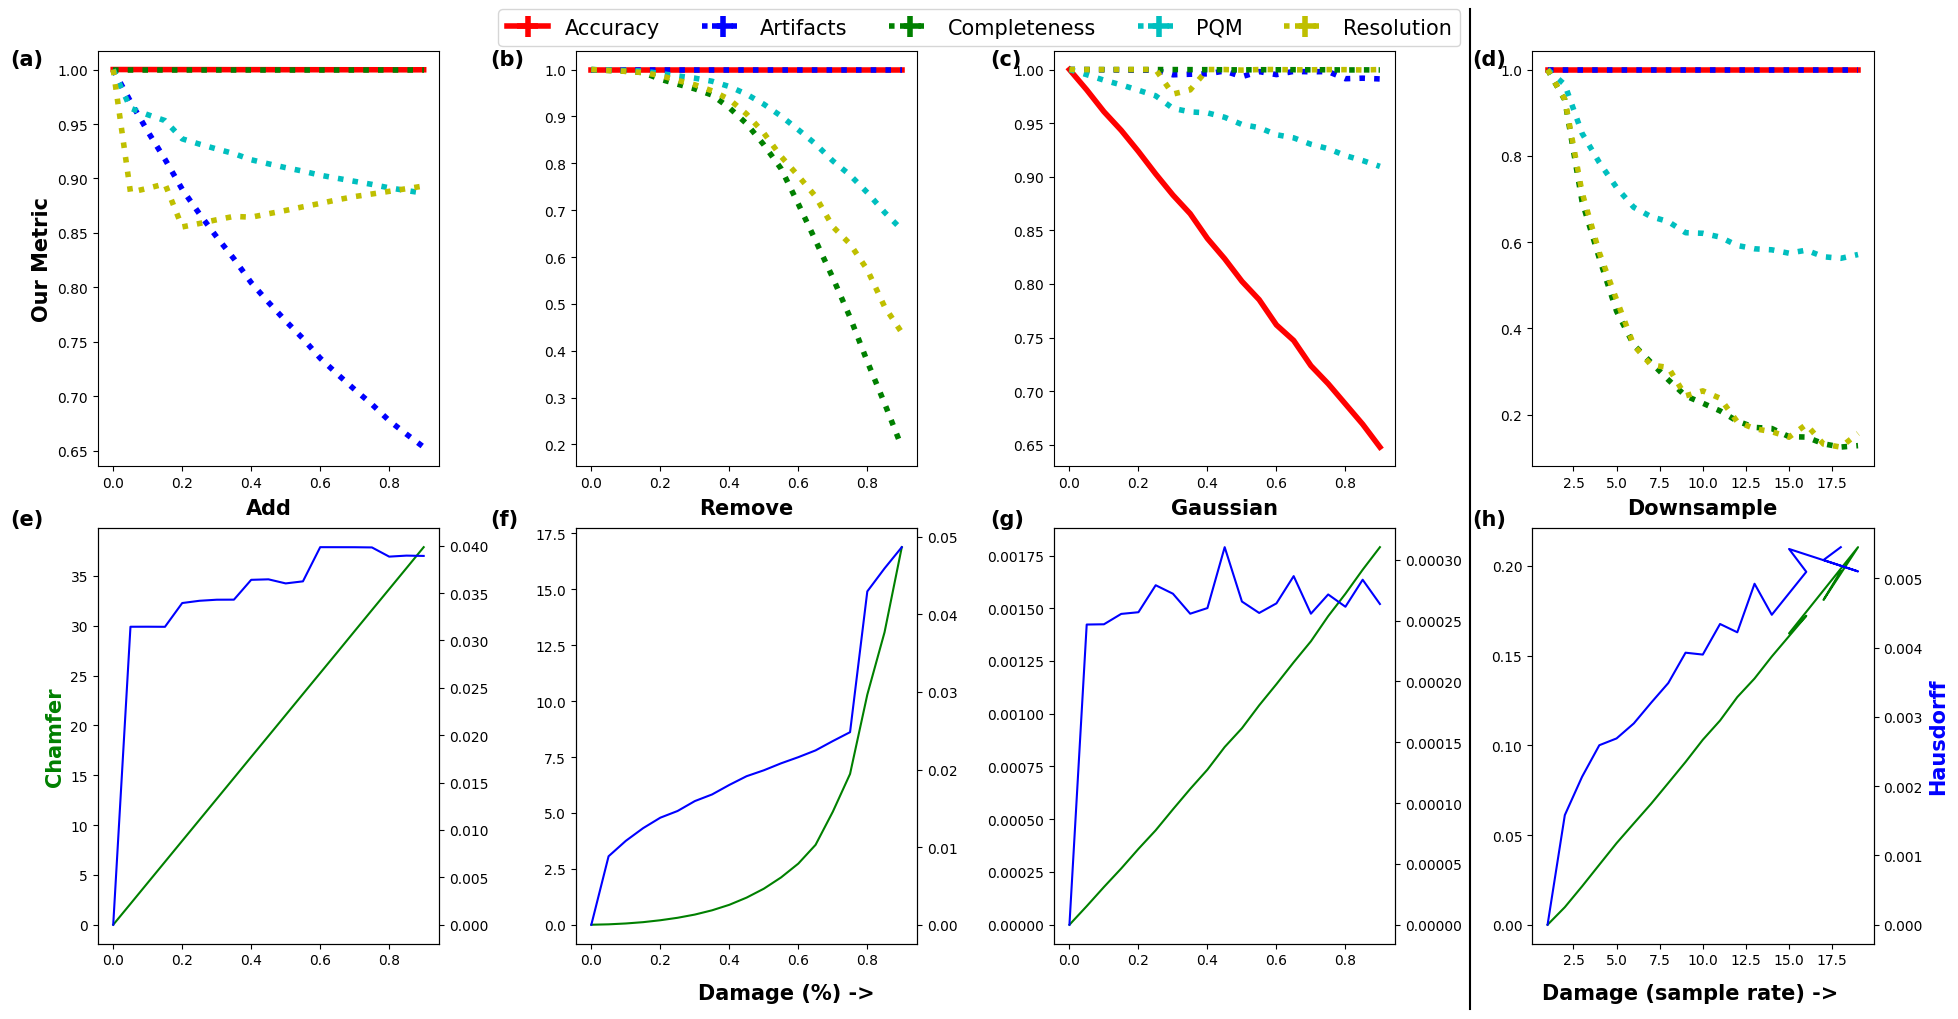

In [17]:
combined_plot()

## Damage Type image

In [18]:
from DamageManager import DamageManager, load_point_cloud
from QualityMetric import calculate_average_distance

import matplotlib.pyplot as plt


import open3d as o3d
import json

import numpy as np
import os

import argparse
from system_constants import *


import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

In [19]:
gt_file = '../sample/bunny/bunny_voxel_0001.ply'


gt_pcd = load_point_cloud(gt_file)
cell_size=0.05

In [20]:
eps = calculate_average_distance(gt_pcd)/2
dmg_mgr = DamageManager(gt_pcd, eps, cell_size)

In [21]:
damage_percent = 0.5

damage_rate = 10

In [22]:
damaged_add_pcd = dmg_mgr.damage_point_cloud(ADD_POINTS_STR, damage_percent)
damaged_remove_pcd = dmg_mgr.damage_point_cloud(REMOVE_POINTS_STR, damage_percent)
damaged_gaussian_pcd = dmg_mgr.damage_point_cloud(GAUSSIAN_STR, damage_percent)
damaged_downsample_pcd = dmg_mgr.damage_point_cloud(DOWNSAMPLE_STR, damage_rate)


Damage type:  add
Damage parameters:  0.5
cell_dim:  [4 4 3]
Damage type:  remove
Damage parameters:  0.5
cell_dim:  [4 4 3]
Damage type:  gaussian
Damage parameters:  0.5
cell_dim:  [4 4 3]
Damage type:  voxel
Damage parameters:  10
cell_dim:  [4 4 3]


In [23]:

from MapMetricManager import MapMetricManager
from util import generate_grid_lines
def capture_img_sequence(label, pcd , min_bound, max_bound, cell_dim, gt_pcd=None, ax=None):
    pcd.paint_uniform_color([1.0, 0.0, 0])

    fontsize =30


    def move_forward(vis):
        ctr = vis.get_view_control()
        image = vis.capture_screen_float_buffer(False)
        if ax is not None:
            print(np.asarray(image).shape)
            ax.imshow(np.asarray(image)[200:, 250:-250,:])
            ax.set_title(label, fontsize=fontsize)
            ax.axis('off')
        else:
            plt.imshow(np.asarray(image))
            plt.title(label, fontsize=fontsize)
            plt.axis('off')
            plt.show()
        vis.destroy_window()
        False
    vis = o3d.visualization.Visualizer()
    vis.create_window()
    vis.add_geometry(pcd)

    if gt_pcd is not None:
        gt_pcd.paint_uniform_color([0.0, 1.0, 0])
        vis.add_geometry(gt_pcd)
    # grid_lines = generate_grid_lines(min_bound, max_bound, cell_dim)        
    # for line in grid_lines:
    #     vis.add_geometry(line)
    
    vis.register_animation_callback(move_forward)
    vis.run()








(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)


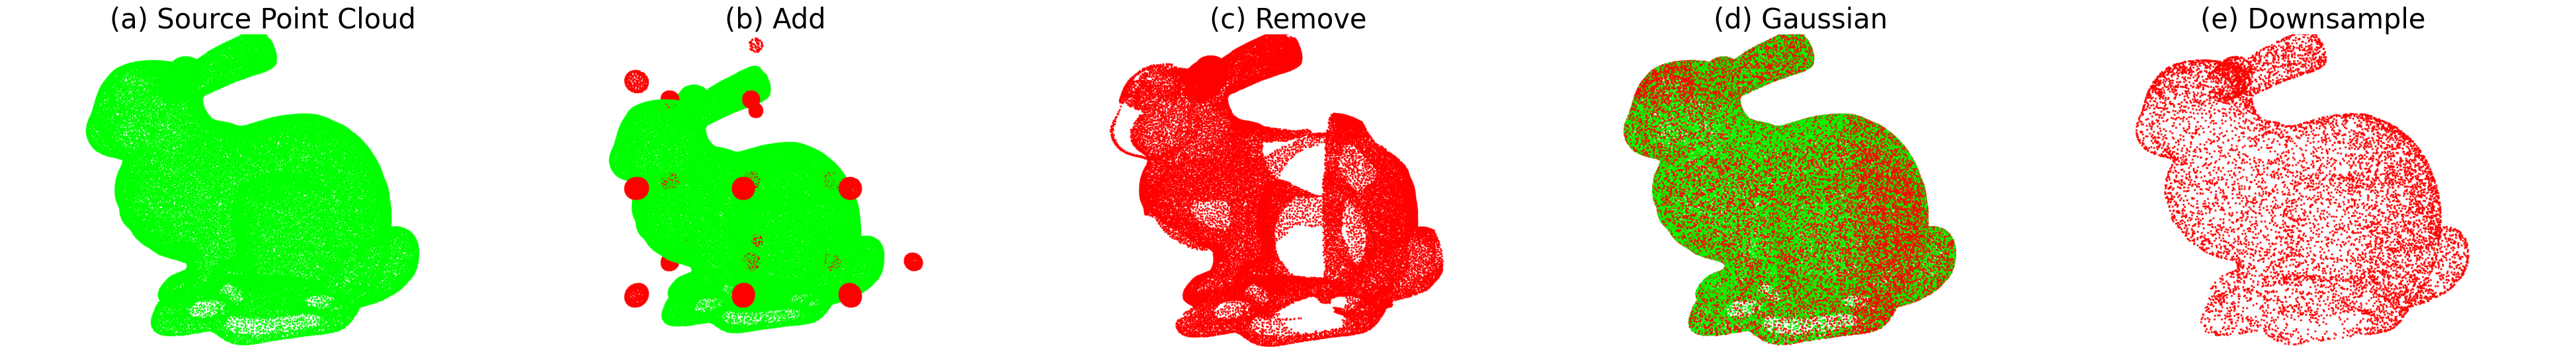

In [24]:
fig, axs = plt.subplots(1, 5, figsize=(50, 20))
#fig.tight_layout(pad=0.1)
capture_img_sequence("(a) Source Point Cloud",gt_pcd, dmg_mgr.min_bound, dmg_mgr.max_bound, dmg_mgr.cell_dim, gt_pcd, axs[0])
capture_img_sequence("(b) Add",damaged_add_pcd, dmg_mgr.min_bound, dmg_mgr.max_bound, dmg_mgr.cell_dim, gt_pcd, axs[1])
capture_img_sequence("(c) Remove",damaged_remove_pcd, dmg_mgr.min_bound, dmg_mgr.max_bound, dmg_mgr.cell_dim, None, axs[2])
capture_img_sequence("(d) Gaussian",damaged_gaussian_pcd, dmg_mgr.min_bound, dmg_mgr.max_bound, dmg_mgr.cell_dim, gt_pcd, axs[3])
capture_img_sequence("(e) Downsample",damaged_downsample_pcd, dmg_mgr.min_bound, dmg_mgr.max_bound, dmg_mgr.cell_dim, None, axs[4])


for a in axs:
    a.set_xticklabels([])
    a.set_yticklabels([])
plt.subplots_adjust(wspace=0, hspace=0)
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1,
#                     right=0.5,
#                     top=0.6,
#                     wspace=0.5,
#                     hspace=0.5)
plt.savefig(os.path.join("../results/Images_plots/bunny_damage_img.pdf"),bbox_inches="tight")
plt.show()

## Individual Plots

In [57]:

from MapMetricManager import MapMetricManager
from util import generate_grid_lines
def capture_img_sequence_no_label(pcd , gt_pcd=None, ax=None):
    pcd.paint_uniform_color([1.0, 0.0, 0])

    fontsize =30


    def move_forward(vis):
        ctr = vis.get_view_control()
        image = vis.capture_screen_float_buffer(False)
        if ax is not None:
            print(np.asarray(image).shape)
            ax.imshow(np.asarray(image)[200:, 250:-250,:])
            #ax.set_title(label, fontsize=fontsize)
            ax.axis('off')
        else:
            print(np.asarray(image).shape)
            plt.imshow(np.asarray(image)[180:-50, 450:-500,:])
            #plt.title(label, fontsize=fontsize)
            plt.axis('off')
            
        vis.destroy_window()
        False
    vis = o3d.visualization.Visualizer()
    vis.create_window()
    vis.add_geometry(pcd)

    if gt_pcd is not None:
        gt_pcd.paint_uniform_color([0.0, 1.0, 0])
        vis.add_geometry(gt_pcd)
    # grid_lines = generate_grid_lines(min_bound, max_bound, cell_dim)        
    # for line in grid_lines:
    #     vis.add_geometry(line)
    
    vis.register_animation_callback(move_forward)
    vis.run()

(1080, 1920, 3)


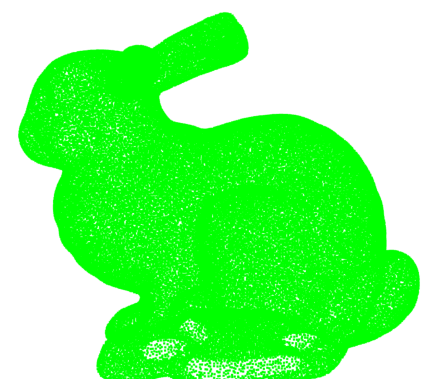

(1080, 1920, 3)


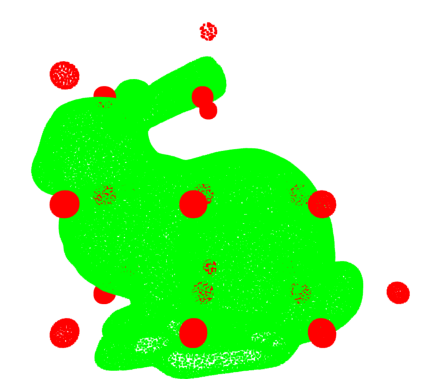

(1080, 1920, 3)


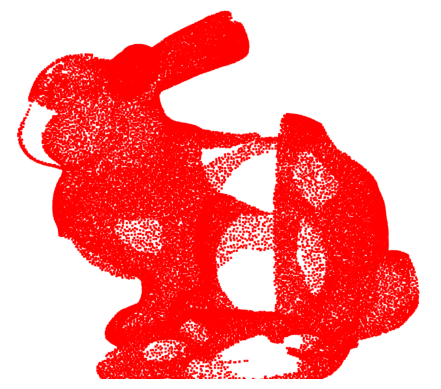

(1080, 1920, 3)


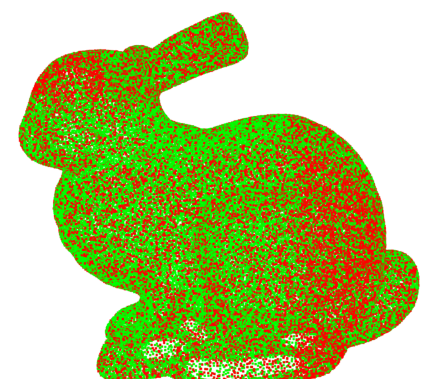

(1080, 1920, 3)


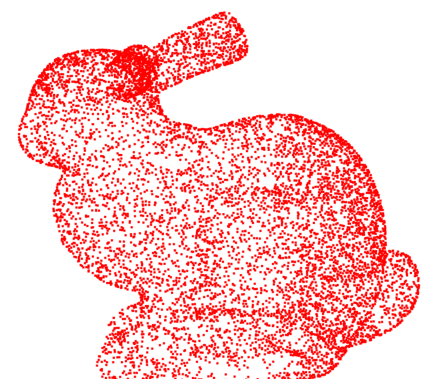

In [59]:
#fig, axs = plt.subplots(1, 5, figsize=(50, 20))
#fig.tight_layout(pad=0.1)
capture_img_sequence_no_label(gt_pcd, gt_pcd)
plt.savefig(os.path.join("../results/Images_plots/final/bunny_damage_img_gt.pdf"),bbox_inches="tight")
plt.show()
capture_img_sequence_no_label(damaged_add_pcd, gt_pcd)
plt.savefig(os.path.join("../results/Images_plots/final/bunny_damage_img_add.pdf"),bbox_inches="tight")
plt.show()
capture_img_sequence_no_label(damaged_remove_pcd, None)
plt.savefig(os.path.join("../results/Images_plots/final/bunny_damage_img_remove.pdf"),bbox_inches="tight")
plt.show()
capture_img_sequence_no_label(damaged_gaussian_pcd, gt_pcd)
plt.savefig(os.path.join("../results/Images_plots/final/bunny_damage_img_gaussian.pdf"),bbox_inches="tight")
plt.show()
capture_img_sequence_no_label(damaged_downsample_pcd, None)
plt.savefig(os.path.join("../results/Images_plots/final/bunny_damage_img_downsample.pdf"),bbox_inches="tight")
plt.show()

# for a in axs:
#     a.set_xticklabels([])
#     a.set_yticklabels([])
# plt.subplots_adjust(wspace=0, hspace=0)
# # plt.subplots_adjust(left=0.1,
# #                     bottom=0.1,
# #                     right=0.5,
# #                     top=0.6,
# #                     wspace=0.5,
# #                     hspace=0.5)
# #plt.savefig(os.path.join("../results/Images_plots/bunny_damage_img.pdf"),bbox_inches="tight")
# plt.show()

In [86]:
import glob
import matplotlib.transforms as mtrans





def get_dual_axis_plot_individual(full_path, cell_size, X_plot, Y_plot, x_label, damage_type_req, font_size=15):

    results = {}

    results[COMPELTENESS_STR]=[]
    results[ACCURACY_STR]=[]
    results[ARTIFACTS_STR]=[]
    results[RESOLUTION_STR]=[]
    results[QUALITY_STR]=[]
    results[HOUSDORFF_STR]=    []
    results[NORMALIZED_CHAMFER_STR]=[]
    results[CHAMFER_STR]=[]

    results[CELL_SIZE_STR] =[]
    results[WEIGHT_ACCURACY_STR] = []
    results[WEIGHT_COMPLETENESS_STR] = []
    results[WEIGHT_ARTIFACTS_STR] = []
    results[WEIGHT_RESOLUTION_STR] = []
    results[EPSILON_STR] = []
    results[CONFIG_GT_FILE_STR] = []
    results[CONFIG_DAMAGE_STR] = []
    results[CONFIG_DAMAGE_PARAMS_STR] = []




    for path in os.listdir(full_path):
        if path.endswith(".json"):
            with open(os.path.join(full_path, path)) as f:
                data_load = json.load(f)
                attrib_dict={}
                attrib_dict[CELL_SIZE_STR] = data_load[CELL_SIZE_STR]
               
                attrib_dict[WEIGHT_ACCURACY_STR] = data_load[CONFIG_OPTIONS_STR][WEIGHT_ACCURACY_STR]
                attrib_dict[WEIGHT_COMPLETENESS_STR] = data_load[CONFIG_OPTIONS_STR][WEIGHT_COMPLETENESS_STR]
                attrib_dict[WEIGHT_ARTIFACTS_STR] = data_load[CONFIG_OPTIONS_STR][WEIGHT_ARTIFACTS_STR]
                attrib_dict[WEIGHT_RESOLUTION_STR] = data_load[CONFIG_OPTIONS_STR][WEIGHT_RESOLUTION_STR]
                attrib_dict[EPSILON_STR] = data_load[CONFIG_OPTIONS_STR][EPSILON_STR]
                file_name = os.path.basename(path)[:-5]
                
                gt_file, damage_type, damage_param, _, _, _ = file_name.split("_")  #gt_basename, damagetype, damage_params, cell_size, weight, eps_
                attrib_dict[CONFIG_GT_FILE_STR] = gt_file
                attrib_dict[CONFIG_DAMAGE_STR] = damage_type
                attrib_dict[CONFIG_DAMAGE_PARAMS_STR] = float(damage_param)

                results[COMPELTENESS_STR].append(data_load[AVERAGE_STR][COMPELTENESS_STR])
                results[ACCURACY_STR].append(data_load[AVERAGE_STR][ACCURACY_STR])
                results[ARTIFACTS_STR].append(data_load[AVERAGE_STR][ARTIFACTS_STR])
                results[RESOLUTION_STR].append(data_load[AVERAGE_STR][RESOLUTION_STR])
                results[QUALITY_STR].append(data_load[AVERAGE_STR][QUALITY_STR])
                results[HOUSDORFF_STR].append(data_load[HOUSDORFF_STR])
                results[NORMALIZED_CHAMFER_STR].append(data_load[NORMALIZED_CHAMFER_STR])
                results[CHAMFER_STR].append(data_load[CHAMFER_STR])

                for attrib in attrib_dict:
                    results[attrib].append(attrib_dict[attrib])
                


    results_df = pd.DataFrame.from_dict(results)



    requred_columns = [CHAMFER_STR, HOUSDORFF_STR, ACCURACY_STR, COMPELTENESS_STR, ARTIFACTS_STR, RESOLUTION_STR, QUALITY_STR, CONFIG_DAMAGE_STR ,CONFIG_DAMAGE_PARAMS_STR, CELL_SIZE_STR]

    #fig, axs =  plt.subplots(1,4, figsize=(20,5))
    axi_index=0
    #font_size=15

    title_map = {
        "voxel": "Downsample",
        "add": "Add",
        "remove": "Remove",
        "gaussian": "Gaussian",
        CONFIG_DAMAGE_PARAMS_STR: "Damage",
        QUALITY_STR: "Quality Metric",

    }

    legend_map = {
        "voxel": "Downsample",
        "add": "Add",
        "remove": "Remove",
        "gaussian": "Gaussian",
        CONFIG_DAMAGE_PARAMS_STR: "Damage",
        QUALITY_STR: "PQM",
        CHAMFER_STR: "Chamfer",
        HOUSDORFF_STR: "Hausdorff",
        ACCURACY_STR: "Accuracy",
        COMPELTENESS_STR: "Completeness",
        ARTIFACTS_STR: "Artifacts",
        RESOLUTION_STR: "Resolution",
        

    }

    damge_type_to_axis = {
        "voxel": 3,
        "add": 0,
        "remove": 1,
        "gaussian": 2
    }

    for name, group in results_df[requred_columns].groupby(CONFIG_DAMAGE_STR):
        #print('--------------------')
        
        if name != damage_type_req:
            continue
        print(name, len(group))
        
        for cell_size_entry, group1 in group.groupby(CELL_SIZE_STR):
            print(cell_size_entry, len(group1))
            print('--------------------')
            

            if cell_size_entry == cell_size:

                #plt.plot(group1[[CONFIG_DAMAGE_PARAMS_STR]], group1[[ACCURACY_STR, COMPELTENESS_STR, ARTIFACTS_STR, RESOLUTION_STR, QUALITY_STR]], label=name1)
                group1.sort_values(by=CONFIG_DAMAGE_PARAMS_STR, ascending=False,inplace=True)
                group1.sort_values(by=QUALITY_STR, ascending=False,inplace=True)

                #print(group1)

                x = group1[X_plot]
                y = group1[Y_plot]
                

                print(x.shape, y.shape)

                #####################################################
                #fig, ax1 = plt.subplots(figsize=(8, 8))
                #ax1 = axs[damge_type_to_axis[name]] # axs[axi_index]
                fig, ax1 = plt.subplots()
                ax2 = ax1.twinx()
                
                ax1.plot(x.to_numpy().flatten() ,y.to_numpy()[:,0].flatten(), 'g-')
                ax2.plot(x.to_numpy().flatten() ,y.to_numpy()[:,1].flatten(), 'b-')
                # damage_title = "Damage (%)"
                # if name == "voxel":
                #     damage_title = "Downsample (Sample Rate)"

                #if axi_index == 0:
                ax1.set_ylabel(legend_map[Y_plot[0]], color='g', fontsize=font_size, weight='bold')
                #elif axi_index==3:
                ax2.set_ylabel(legend_map[Y_plot[1]], color='b', fontsize=font_size, weight='bold')
                ax1.set_xlabel(x_label, fontsize=font_size)
                #ax1.set_ylabel(legend_map[Y_plot[0]], color='g', fontsize=font_size)
                #ax2.set_ylabel(legend_map[Y_plot[1]], color='b', fontsize=font_size)
                
                return
                axi_index+=1

                #ax2.set_title(title_map[name], fontsize=font_size, weight='bold', pad=10)



    # fig.tight_layout(pad=0.05)
    # plt.savefig(os.path.join("../results/Images_plots/ref_metric_damage.pdf"), bbox_inches="tight")
    # plt.show()
        
        

    return



def get_errorbar_plot_new(full_path, required_columns, y_tick_labels, x_label, damage_type, font_size=15, show_legend= True):

    df_list = []
    for path in glob.glob(full_path+'_*'):
        #print(path)
        df_list.append(get_results_from_path(path, required_columns))

    new_df = pd.DataFrame()

    #fig, ax = plt.subplots(1,4, figsize=(20,5))

    damage_vs_index = {
        ADD_POINTS_STR: 0,#(0,0),
        REMOVE_POINTS_STR: 1,#(0,1),
        GAUSSIAN_STR: 2, #(1,0),
        DOWNSAMPLE_STR: 3, #(1,1)
    }

    damage_to_title = {
        ADD_POINTS_STR: "Add Points",
        REMOVE_POINTS_STR: "Remove Points",
        GAUSSIAN_STR: "Gaussian Noise",
        DOWNSAMPLE_STR: "Down sample",
        ACCURACY_STR: "Accuracy",
        COMPELTENESS_STR: "Completeness",
        ARTIFACTS_STR: "Artifacts",
        RESOLUTION_STR: "Resolution",
        QUALITY_STR: "PQM",
    }


    #font_size = 12

    metric_to_color = {
        ACCURACY_STR: 'r',
        COMPELTENESS_STR: 'g',
        ARTIFACTS_STR: 'b',
        RESOLUTION_STR: 'y',
        QUALITY_STR: 'c',
    }
    
    metric_to_fmt = {
        ACCURACY_STR: '-',
        COMPELTENESS_STR: ':',
        ARTIFACTS_STR: ':',
        RESOLUTION_STR: ':',
        QUALITY_STR: ':',
    }
    for damage in df_list[0][CONFIG_DAMAGE_STR].unique():
        if damage != damage_type:
            continue
        print(damage)
        x_data = {}
        y_data = []
        x_data[ACCURACY_STR] = []
        x_data[ARTIFACTS_STR] = []
        x_data[COMPELTENESS_STR] = []
        x_data[QUALITY_STR] = []
        x_data[RESOLUTION_STR] = []

        for i in range(len(df_list)):
            df_curr = df_list[i][df_list[i][CONFIG_DAMAGE_STR]==damage].sort_values(by=[CONFIG_DAMAGE_PARAMS_STR])

            x_data[ACCURACY_STR].append(df_curr[ACCURACY_STR])
            x_data[ARTIFACTS_STR].append(df_curr[ARTIFACTS_STR])
            x_data[COMPELTENESS_STR].append(df_curr[COMPELTENESS_STR])
            x_data[QUALITY_STR].append(df_curr[QUALITY_STR])
            x_data[RESOLUTION_STR].append(df_curr[RESOLUTION_STR])  
            #print(df_list[i].keys())
        
            y_data = np.array(df_curr[CONFIG_DAMAGE_PARAMS_STR])
            break



        x_data[ACCURACY_STR] = np.array(x_data[ACCURACY_STR])
        x_data[ARTIFACTS_STR] = np.array(x_data[ARTIFACTS_STR])
        x_data[COMPELTENESS_STR] = np.array(x_data[COMPELTENESS_STR])
        x_data[QUALITY_STR] = np.array(x_data[QUALITY_STR])
        x_data[RESOLUTION_STR] = np.array(x_data[RESOLUTION_STR])

        #print(x_data[ACCURACY_STR].min(axis=0).shape, y_data.shape)
        #print(y_data)
        plt.figure()
        #plt_i = damage_vs_index[damage]
        for metric in [ACCURACY_STR, ARTIFACTS_STR, COMPELTENESS_STR, QUALITY_STR , RESOLUTION_STR]:
            metric_legend = damage_to_title[metric]
            #print("metric legend: ",metric_legend)
            #ax[plt_i].
            plt.errorbar(y_data, x_data[metric].mean(axis=0), xerr=x_data[metric].max(axis=0)- x_data[metric].min(axis=0), yerr=x_data[metric].max(axis=0)- x_data[metric].min(axis=0), label=metric_legend, color=metric_to_color[metric], ls=metric_to_fmt[metric], lw=4)
            plt.xlabel(x_label, fontsize=font_size) 
            plt.ylabel("Quality", fontsize=font_size)
            if show_legend:
                plt.legend(fontsize=font_size, loc='lower left')

        return
    #xticklabels = [damage_to_title[x] for x in xticklabels]        

    # ax[1].sharex(ax[0])
    # ax[2].sharex(ax[0])


def individual_plot():

    x_label_percent = 'Degradation (%)'
    x_label_rate = 'Degradation (Sample rate)'
    y_label_ours = 'Quality'

    font_size = 15
    
    #fig, axes = plt.subplots(2,4, figsize=(20,10))

    path = '../results/bunny_v7_v1/'
    cell_size = 0.05
    X_plot = [CONFIG_DAMAGE_PARAMS_STR]
    Y_plot = [CHAMFER_STR, HOUSDORFF_STR]

    # ax2 = [axes[0,0], axes[0,1], axes[0,2], axes[0,3]]
    # ax1 = [axes[1,0], axes[1,1], axes[1,2], axes[1,3]]

    get_dual_axis_plot_individual(path, cell_size, X_plot, Y_plot, x_label_percent, ADD_POINTS_STR, font_size)
    plt.savefig(os.path.join("../results/Images_plots/final/bunny_damage_ref_plot_add.pdf"),bbox_inches="tight")
    plt.show()

    get_dual_axis_plot_individual(path, cell_size, X_plot, Y_plot, x_label_percent, REMOVE_POINTS_STR, font_size)
    plt.savefig(os.path.join("../results/Images_plots/final/bunny_damage_ref_plot_remove.pdf"),bbox_inches="tight")
    plt.show()

    get_dual_axis_plot_individual(path, cell_size, X_plot, Y_plot, x_label_percent, GAUSSIAN_STR, font_size)
    plt.savefig(os.path.join("../results/Images_plots/final/bunny_damage_ref_plot_gaussian.pdf"),bbox_inches="tight")
    plt.show()

    get_dual_axis_plot_individual(path, cell_size, X_plot, Y_plot, x_label_rate, DOWNSAMPLE_STR, font_size)
    plt.savefig(os.path.join("../results/Images_plots/final/bunny_damage_ref_plot_downsample.pdf"),bbox_inches="tight")
    plt.show()    


    path = '../results/bunny_v7'
    requred_columns = [ACCURACY_STR, COMPELTENESS_STR, ARTIFACTS_STR, RESOLUTION_STR, QUALITY_STR, CONFIG_DAMAGE_STR ,CONFIG_DAMAGE_PARAMS_STR]
    y_tick_labels = [ACCURACY_STR, ARTIFACTS_STR, COMPELTENESS_STR, QUALITY_STR , RESOLUTION_STR]
    get_errorbar_plot_new(path, requred_columns, y_tick_labels, x_label_percent, ADD_POINTS_STR, font_size)
    plt.savefig(os.path.join("../results/Images_plots/final/bunny_damage_plot_add.pdf"),bbox_inches="tight")
    plt.show()
    get_errorbar_plot_new(path, requred_columns, y_tick_labels, x_label_percent, REMOVE_POINTS_STR, font_size, False)
    plt.savefig(os.path.join("../results/Images_plots/final/bunny_damage_plot_remove.pdf"),bbox_inches="tight")
    plt.show()    
    get_errorbar_plot_new(path, requred_columns, y_tick_labels, x_label_percent, GAUSSIAN_STR, font_size, False)
    plt.savefig(os.path.join("../results/Images_plots/final/bunny_damage_plot_gaussian.pdf"),bbox_inches="tight")
    plt.show()
    get_errorbar_plot_new(path, requred_columns, y_tick_labels, x_label_rate, DOWNSAMPLE_STR, font_size, False)
    plt.savefig(os.path.join("../results/Images_plots/final/bunny_damage_plot_downsample.pdf"),bbox_inches="tight")
    plt.show()





    #plt.savefig(os.path.join("../results/Images_plots/bunny_damage_plots_combined.pdf"),bbox_inches="tight")
    #plt.show()

add 19
0.05 19
--------------------
(19, 1) (19, 2)


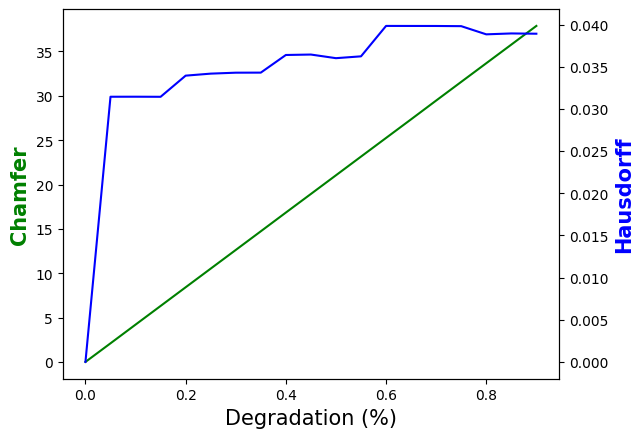

remove 19
0.05 19
--------------------
(19, 1) (19, 2)


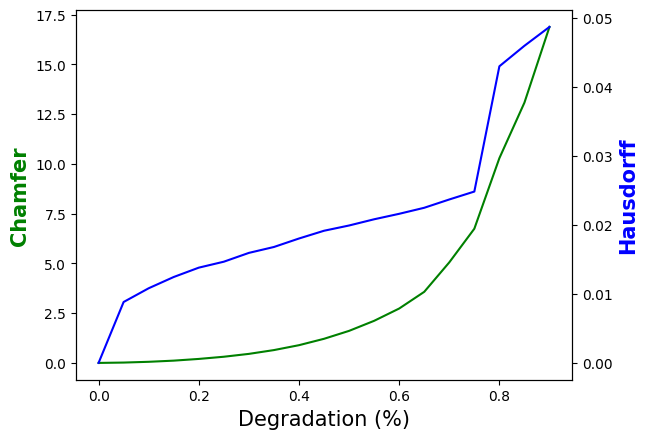

gaussian 19
0.05 19
--------------------
(19, 1) (19, 2)


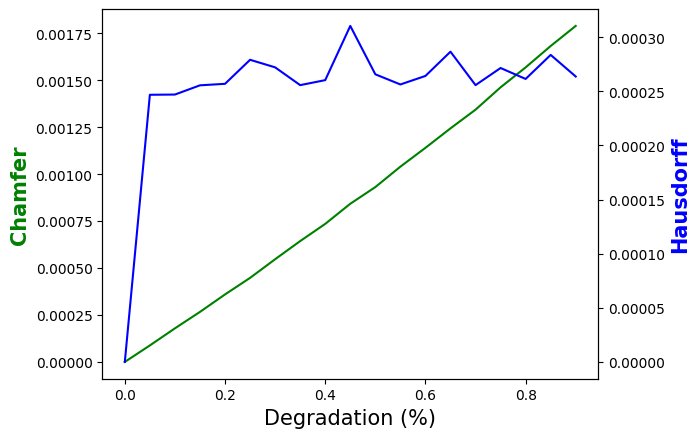

voxel 19
0.05 19
--------------------
(19, 1) (19, 2)


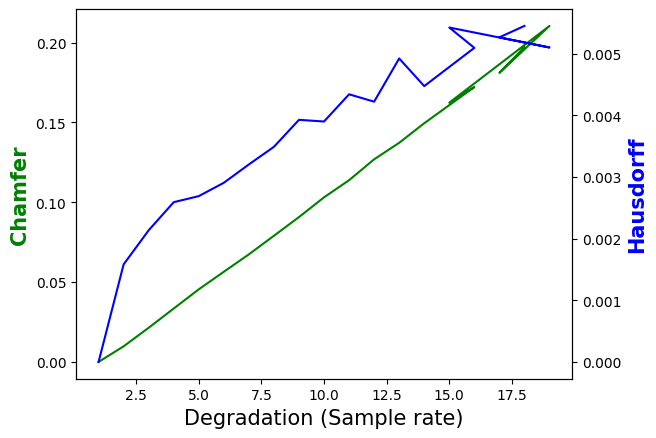

add


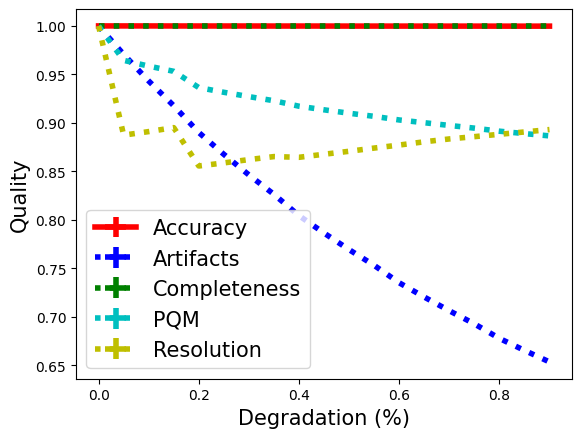

remove


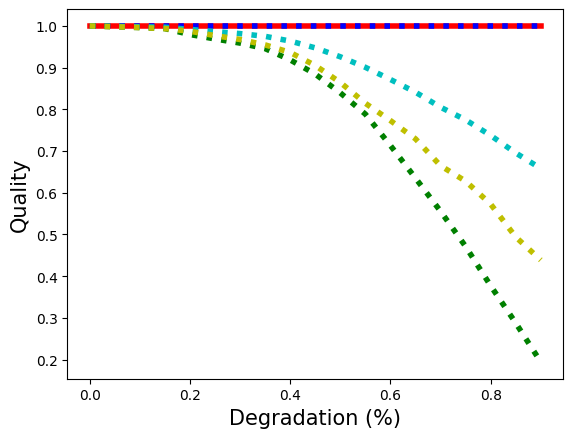

gaussian


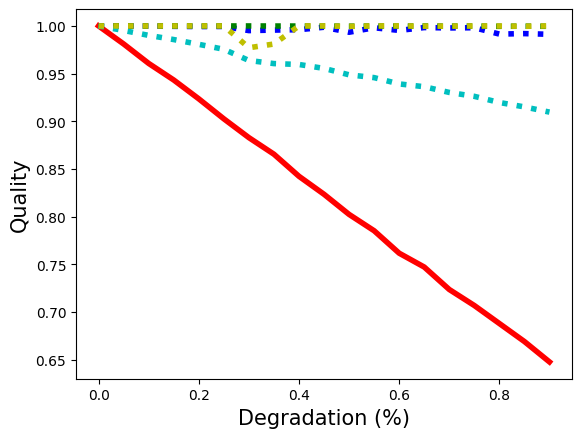

voxel


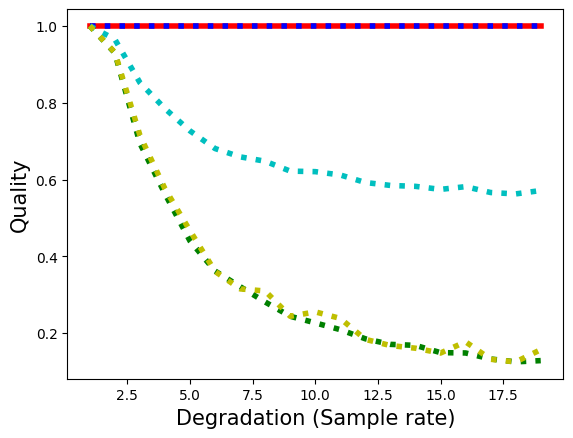

In [87]:
individual_plot()